Hazard Rate Model - Generated by Google AI Studio

-----
Non-time dependent default probability
----

In [2]:

import numpy as np
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

import numpy as np : 
Imports the NumPy library, which provides support for numerical operations and arrays. We use np as a conventional alias.

import pandas as pd: 
Imports the pandas library, which provides data structures and analysis tools, particularly DataFrames. We use pd as a conventional alias.

from lifelines import CoxPHFitter: 
Imports the CoxPHFitter class from the lifelines library, which is used to fit Cox Proportional Hazards models.

import matplotlib.pyplot as plt: 
Imports the pyplot module from the Matplotlib library, which is used for plotting graphs and visualizations. We use plt as a conventional alias.

In [3]:
# 1. Data Generation (replace with your actual data)
np.random.seed(42)
n_obs = 500

# Time of Default
time_to_default = np.random.exponential(scale=5, size=n_obs)
# Censoring indicator (1 if default, 0 if censored)
default_status = np.random.binomial(1, p=0.7, size=n_obs)
# Time is censored at 10 if no default
time = np.minimum(time_to_default, 10)

df = pd.DataFrame({
    'time': time,
    'credit_score': np.random.randint(300, 800, n_obs),
    'debt_ratio': np.random.uniform(0, 1, n_obs),
    'default_status': default_status
})

In [4]:
df

,time,credit_score,debt_ratio,default_status
0,2.346340,602,0.598327,1
1,10.000000,311,0.607306,1
2,6.583728,617,0.247540,1
3,4.564713,379,0.558413,0
4,0.848124,515,0.225540,1
...,...,...,...,...
495,2.179768,345,0.582148,1
496,4.381219,314,0.680975,0
497,0.404611,452,0.189695,1
498,10.000000,521,0.618948,0


np.random.seed(42): 
Sets the seed for the random number generator. This ensures that the random numbers generated are reproducible, allowing you to get the same results each time you run the code.

n_obs = 500: 
Defines the number of observations (data points) we will simulate, which is set to 500.

time_to_default = np.random.exponential(scale=5, size=n_obs): 
Simulates the time until default using an exponential distribution with a scale parameter of 5 and a size equal to n_obs. The time is for the simulated default time.

default_status = np.random.binomial(1, p=0.7, size=n_obs): 
Simulates the default status using a binomial distribution. With a probability of 0.7. 1 means a default happened and 0 means the data is censored.

time = np.minimum(time_to_default, 10): 
Creates a 'time' column which is the minimum between time_to_default and 10, which means if the time_to_default is greater than 10, we censor the time at 10.

df = pd.DataFrame(...): 
Creates a pandas DataFrame with columns for 'time', 'credit_score', 'debt_ratio', and 'default_status'. The DataFrame will store the simulated data.

In [5]:
# 2. Model Training (Cox Proportional Hazards)
cph = CoxPHFitter() 
cph.fit(df, 'time', 'default_status')

# Print the summary
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 500 total observations, 134 right-censored observations>
             duration col = 'time'
                event col = 'default_status'
      baseline estimation = breslow
   number of observations = 500
number of events observed = 366
   partial log-likelihood = -1929.28
         time fit was run = 2025-04-25 09:58:56 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
credit_score -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
debt_ratio    0.01      1.01      0.19           -0.37            0.39                0.69                1.48

              cmp to     z    p  -log2(p)
covariate                                
credit_score    0.00 -0.57 0.57      0.81
debt_ratio      0.00  0.05 0.96      0.05
---
Concordance = 0.51
Partial AIC = 3862.55
log-likelihood ratio test = 0.32 on 2 df
-log2(p) of ll-ratio test = 0.23

cph = CoxPHFitter(): 
Initializes an instance of the CoxPHFitter class, which is used to fit a Cox proportional hazards model.

cph.fit(df, 'time', 'default_status'): 
Fits the Cox proportional hazards model to the DataFrame df. 'time' specifies the event time, and 'default_status' indicates whether a default event occurred (1) or the observation was censored (0).

cph.print_summary(): 
Prints a summary of the fitted model, which includes coefficient estimates, standard errors, confidence intervals, and other statistics. This is useful for understanding the results of the model and for testing model assumptions.

In [6]:
# 3. Survival Function and Default Probability Calculation

# New Data
new_data_dict = {
    'credit_score': [600, 750],
    'debt_ratio': [0.2, 0.4]
}
new_data = pd.DataFrame(new_data_dict)

# Get Survival function given new data
survival_function = cph.predict_survival_function(new_data)

# Time points for probability
time_points = np.arange(0, 11, 1)

# Reindex the survival function to match the time_points
survival_prob = survival_function.reindex(time_points, method='pad').fillna(1)

# Calculate Default probability for each time point given new data
default_prob = 1 - survival_prob

In [7]:
print(new_data)

   credit_score  debt_ratio
0           600         0.2
1           750         0.4


In [8]:
print(survival_function)

                  0         1
0.025372   0.998025  0.998080
0.027687   0.996050  0.996160
0.034882   0.994075  0.994240
0.046198   0.994075  0.994240
0.054484   0.992097  0.992316
...             ...       ...
9.706747   0.274257  0.284327
9.774196   0.270830  0.280873
9.856725   0.270830  0.280873
9.942648   0.267361  0.277375
10.000000  0.122162  0.129535

[425 rows x 2 columns]


In [9]:
print(time_points)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [10]:
print(survival_prob)

           0         1
0   1.000000  1.000000
1   0.844918  0.848896
2   0.729102  0.735552
3   0.655206  0.662974
4   0.571453  0.580436
5   0.500135  0.509889
6   0.427998  0.438243
7   0.379589  0.389978
8   0.334231  0.344598
9   0.284162  0.294305
10  0.122162  0.129535


new_data_dict = { ... }: 
Creates a dictionary containing the values of credit score and debt ratio for two new assets, this represents the predictors for which we would like to predict survival/default probabilities.

new_data = pd.DataFrame(new_data_dict): 
Creates a DataFrame new_data from the new_data_dict, the dataframe which we will pass into the model for prediction.

survival_function = cph.predict_survival_function(new_data): 
Uses the trained Cox model (cph) to predict the survival functions for each of the assets in new_data. The result survival_function is a DataFrame with each row representing a specific event time in the original training dataset, and columns representing survival probabilities for each asset in new_data.

time_points = np.arange(0, 11, 1): 
Creates an array of time points from 0 to 10 with a step of 1.

survival_prob = survival_function.reindex(time_points, method='pad').fillna(1): 
Reindexes the survival function to align with the specified time points. Using 'pad' as the method parameter means the missing survival probabilities are padded using the previous known event time survival probability, filling it with 1 when there is no prior value (for times before all failure times).

default_prob = 1 - survival_prob: 
Calculates the default probability for each time point by subtracting the survival probability from 1.

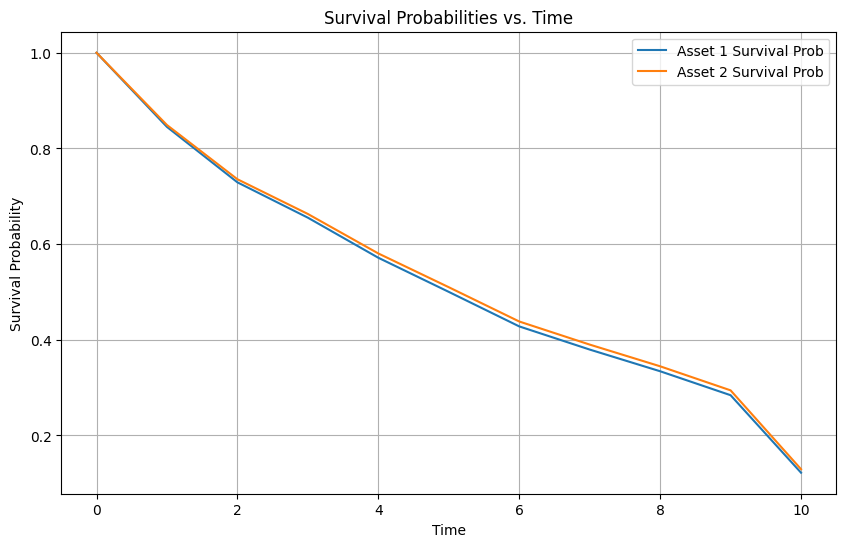

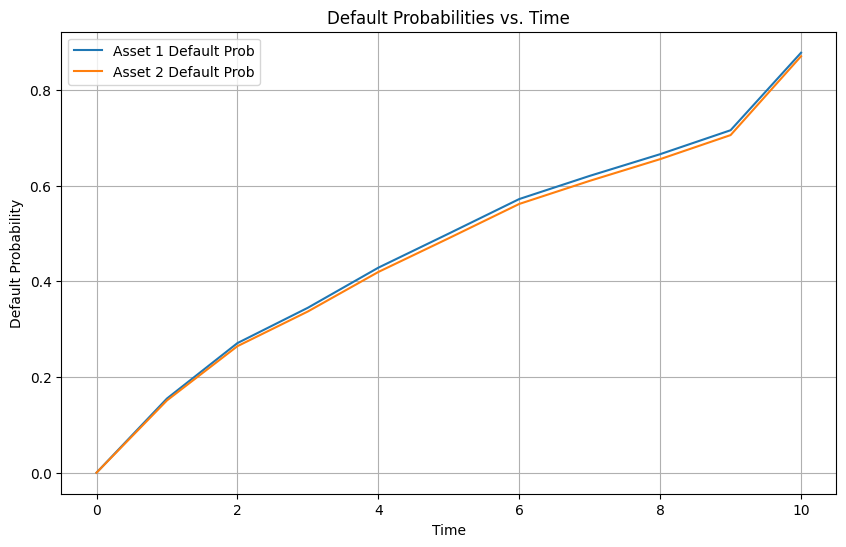

Survival Probability:
           0         1
0   1.000000  1.000000
1   0.844918  0.848896
2   0.729102  0.735552
3   0.655206  0.662974
4   0.571453  0.580436
5   0.500135  0.509889
6   0.427998  0.438243
7   0.379589  0.389978
8   0.334231  0.344598
9   0.284162  0.294305
10  0.122162  0.129535

Default Probability:
           0         1
0   0.000000  0.000000
1   0.155082  0.151104
2   0.270898  0.264448
3   0.344794  0.337026
4   0.428547  0.419564
5   0.499865  0.490111
6   0.572002  0.561757
7   0.620411  0.610022
8   0.665769  0.655402
9   0.715838  0.705695
10  0.877838  0.870465


In [11]:
# Plotting
plt.figure(figsize=(10, 6))
for i in range(len(new_data)):
    plt.plot(time_points, survival_prob.iloc[:, i], label=f"Asset {i+1} Survival Prob")
plt.title('Survival Probabilities vs. Time')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for i in range(len(new_data)):
    plt.plot(time_points, default_prob.iloc[:, i], label=f"Asset {i+1} Default Prob")
plt.title('Default Probabilities vs. Time')
plt.xlabel('Time')
plt.ylabel('Default Probability')
plt.legend()
plt.grid(True)
plt.show()

print("Survival Probability:")
print(survival_prob)
print("\nDefault Probability:")
print(default_prob)

plt.figure(figsize=(10, 6)): 
Creates a new figure with a specified size.

for i in range(len(new_data)):: 
Starts a loop that iterates over each asset in new_data.

plt.plot(time_points, survival_prob.iloc[:, i], label=f"Asset {i+1} Survival Prob"): 
Plots the survival probability over time for the current asset. time_points provides the x-values, and survival_prob.iloc[:, i] gets all the time points for the given asset (the y-values).

plt.title(...), plt.xlabel(...), plt.ylabel(...): 
Sets the title, x-axis label, and y-axis label for the plot.

plt.legend(): 
Displays the legend for the plot.

plt.grid(True): 
Adds a grid to the plot.

plt.show(): 
Displays the plot.

The following lines will repeat the same code to create default probability plot.

print("Survival Probability:"), print(survival_prob): 
Prints the computed survival probabilities to the console.

print("\nDefault Probability:"), print(default_prob): 
Prints the computed default probabilities to the console.

----
Time Dependent Default Probability
----
Using Hazard Rate Model

In [12]:
import numpy as np
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

import numpy as np: Imports the NumPy library for numerical operations.

import pandas as pd: Imports the pandas library for data manipulation using DataFrames.

from lifelines import CoxPHFitter: Imports the CoxPHFitter class from lifelines for Cox Proportional Hazards modeling.

import matplotlib.pyplot as plt: Imports matplotlib.pyplot for plotting.

In [13]:
# 1. Data Generation (replace with your actual data)
np.random.seed(42)
n_obs = 500
max_time = 10 # Maximum observation time


# Time of Default
time_to_default = np.random.exponential(scale=5, size=n_obs)
# Censoring indicator (1 if default, 0 if censored)
default_status = np.random.binomial(1, p=0.7, size=n_obs)
# Time is censored at 10 if no default
time = np.minimum(time_to_default, max_time)

# Generate Credit Score (constant)
credit_score = np.random.randint(300, 800, n_obs)

np.random.seed(42): Sets the random seed for reproducibility.

n_obs = 500: Sets the number of simulated observations.

max_time = 10: Sets the maximum observation time or the censoring time.

time_to_default = np.random.exponential(scale=5, size=n_obs): Simulates default times from an exponential distribution.

default_status = np.random.binomial(1, p=0.7, size=n_obs): Simulates default status (1=default, 0=censored).

time = np.minimum(time_to_default, max_time): Censors the default time to max_time.

credit_score = np.random.randint(300, 800, n_obs): Simulates constant credit scores for each observation.

In [14]:
# Generate time dependent debt ratio
def generate_time_varying_debt_ratio(n_obs, max_time):
    all_debt_ratios = []
    for i in range(n_obs):
        # Generate start and end points for debt ratio
        start_ratio = np.random.uniform(0,1)
        end_ratio = np.random.uniform(0,1)
        # Generate random time to change debt ratio, can be more than one in real life
        change_time = np.random.uniform(0,max_time)
        # create time-dependent debt ratio
        current_time_ratios = []
        for t in np.arange(0, max_time + 1, 1):
          if t <= change_time:
              current_time_ratios.append(start_ratio)
          else:
              current_time_ratios.append(end_ratio)
        all_debt_ratios.append(current_time_ratios)

    return np.array(all_debt_ratios)

# Generate time-varying debt ratio
debt_ratio_time_varying = generate_time_varying_debt_ratio(n_obs, max_time)

In [15]:
print(debt_ratio_time_varying)

[[0.59832727 0.59832727 0.59832727 ... 0.60730645 0.60730645 0.60730645]
 [0.55841267 0.55841267 0.22554014 ... 0.22554014 0.22554014 0.22554014]
 [0.65151947 0.65151947 0.65151947 ... 0.32592546 0.32592546 0.32592546]
 ...
 [0.89607511 0.89607511 0.89607511 ... 0.84719444 0.84719444 0.84719444]
 [0.27623732 0.27623732 0.27623732 ... 0.98165332 0.98165332 0.98165332]
 [0.90642096 0.90642096 0.90642096 ... 0.16388102 0.16388102 0.16388102]]


def generate_time_varying_debt_ratio(n_obs, max_time):: Defines a function to generate time-varying debt ratios.

It will generate a random start_ratio and end_ratio.

It will also generate a random change_time.

Then it will generate a time series from 0 to max_time with time step of 1. The value will be start_ratio till the time of change, and end_ratio after that.

debt_ratio_time_varying = generate_time_varying_debt_ratio(n_obs, max_time): Calls the function and gets a numpy array containing all time series of debt ratios.

In [16]:
# Create DataFrame for lifelines
rows = []
for i in range(n_obs):
  for t in np.arange(0, max_time + 1, 1):
      if t <= time[i]: # Only include times until time to default or censoring
        rows.append([t, credit_score[i], debt_ratio_time_varying[i, int(t)],default_status[i], time[i]])

df = pd.DataFrame(rows, columns=['time', 'credit_score', 'debt_ratio', 'default_status', 'event_time'])

In [17]:
print(df)

      time  credit_score  debt_ratio  default_status  event_time
0        0           602    0.598327               1     2.34634
1        1           602    0.598327               1     2.34634
2        2           602    0.598327               1     2.34634
3        0           311    0.558413               1    10.00000
4        1           311    0.558413               1    10.00000
...    ...           ...         ...             ...         ...
2465     6           505    0.906421               1    10.00000
2466     7           505    0.163881               1    10.00000
2467     8           505    0.163881               1    10.00000
2468     9           505    0.163881               1    10.00000
2469    10           505    0.163881               1    10.00000

[2470 rows x 5 columns]


rows = []: Initializes an empty list to store data rows for the DataFrame.

for i in range(n_obs):: Loops through each observation.

for t in np.arange(0, max_time + 1, 1):: Loops through all time points (from 0 to max_time).

if t <= time[i]:: It only includes times up to the time to default or censoring.

rows.append(...): Appends the current time, credit score, debt ratio at time t, default status, and event time for each observation to rows.

df = pd.DataFrame(rows, columns=[...]): Creates a pandas DataFrame from the rows list with specified column names.

In [18]:
# 2. Model Training (Cox Proportional Hazards)
cph = CoxPHFitter()
cph.fit(df, 'event_time', 'default_status', formula = 'credit_score + debt_ratio') #specify formula to specify the predictors

# Print the summary
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 2470 total observations, 652 right-censored observations>
             duration col = 'event_time'
                event col = 'default_status'
      baseline estimation = breslow
   number of observations = 2470
number of events observed = 1818
   partial log-likelihood = -12597.61
         time fit was run = 2025-04-25 09:58:56 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
credit_score -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
debt_ratio   -0.13      0.88      0.08           -0.29            0.03                0.75                1.03

              cmp to     z    p  -log2(p)
covariate                                
credit_score    0.00 -0.93 0.35      1.51
debt_ratio      0.00 -1.61 0.11      3.23
---
Concordance = 0.51
Partial AIC = 25199.23
log-likelihood ratio test = 3.41 on 2 df
-log2(p) of ll-ratio test = 2.46

cph = CoxPHFitter(): Initializes the CoxPHFitter.

cph.fit(df, 'event_time', 'default_status', formula = 'credit_score + debt_ratio'): Fits the Cox Proportional Hazards model.

df is the dataframe,

event_time is the name of the column representing the event time (or censoring time),

default_status is the column with default indicator (1 for default, 0 for censoring),

formula = 'credit_score + debt_ratio' specifies the predictors.

cph.print_summary(): Prints the model summary.

In [19]:
# 3. Survival Function and Default Probability Calculation

# New Data
new_data_dict = {
    'credit_score': [600, 750],
    'debt_ratio': [[0.2, 0.2, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                 [0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]]
}

new_data = pd.DataFrame({
    'credit_score' : new_data_dict['credit_score'],
    'debt_ratio' : new_data_dict['debt_ratio']
})

# create time expanded data for new data
new_rows = []
for i in range(len(new_data)):
  for t in np.arange(0, max_time + 1, 1):
        new_rows.append([t, new_data['credit_score'][i], new_data['debt_ratio'][i][int(t)]])

new_df = pd.DataFrame(new_rows, columns=['time', 'credit_score', 'debt_ratio'])
# Get Survival function given new data
survival_function = cph.predict_survival_function(new_df)

# Time points for probability
time_points = np.arange(0, max_time + 1, 1)

# Reindex the survival function to match the time_points
survival_prob = survival_function.reindex(time_points, method='pad').fillna(1)

# Calculate Default probability for each time point given new data
default_prob = 1 - survival_prob

In [20]:
print(new_df)

    time  credit_score  debt_ratio
0      0           600         0.2
1      1           600         0.2
2      2           600         0.2
3      3           600         0.2
4      4           600         0.2
5      5           600         0.5
6      6           600         0.5
7      7           600         0.5
8      8           600         0.5
9      9           600         0.5
10    10           600         0.5
11     0           750         0.4
12     1           750         0.4
13     2           750         0.4
14     3           750         0.6
15     4           750         0.6
16     5           750         0.6
17     6           750         0.6
18     7           750         0.6
19     8           750         0.6
20     9           750         0.6
21    10           750         0.6


In [21]:
print(survival_prob)

          0         1         2         3         4         5         6   \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.968029  0.968029  0.968029  0.968029  0.968029  0.969225  0.969225   
2   0.922149  0.922149  0.922149  0.922149  0.922149  0.924993  0.924993   
3   0.879541  0.879541  0.879541  0.879541  0.879541  0.883841  0.883841   
4   0.817622  0.817622  0.817622  0.817622  0.817622  0.823900  0.823900   
5   0.753814  0.753814  0.753814  0.753814  0.753814  0.761951  0.761951   
6   0.678097  0.678097  0.678097  0.678097  0.678097  0.688178  0.688178   
7   0.620266  0.620266  0.620266  0.620266  0.620266  0.631623  0.631623   
8   0.559607  0.559607  0.559607  0.559607  0.559607  0.572086  0.572086   
9   0.485205  0.485205  0.485205  0.485205  0.485205  0.498720  0.498720   
10  0.202173  0.202173  0.202173  0.202173  0.202173  0.214832  0.214832   

          7         8         9   ...        12        13        14        15  \
0   1.

new_data_dict = { ... }: Defines a dictionary to hold data for new observations with time varying debt ratios.

new_data = pd.DataFrame(...): Creates a DataFrame new_data from the new data dictionary.

We create an expanded dataset using a nested for loop. This is same method that we used to generate the training data.

new_df = pd.DataFrame(new_rows, columns=[...]): Creates the new data dataframe.

survival_function = cph.predict_survival_function(new_df): Predicts the survival function for the new data using the trained Cox model.

time_points = np.arange(0, max_time + 1, 1): Creates a sequence of time points for probability calculation.

survival_prob = survival_function.reindex(time_points, method='pad').fillna(1): Reindexes the survival function to the specified time points and fills the missing values using forward fill (pad) method, the fillna method fills the values for those timepoints which are earlier than the first timepoint in the index.

default_prob = 1 - survival_prob: Calculates the default probability.

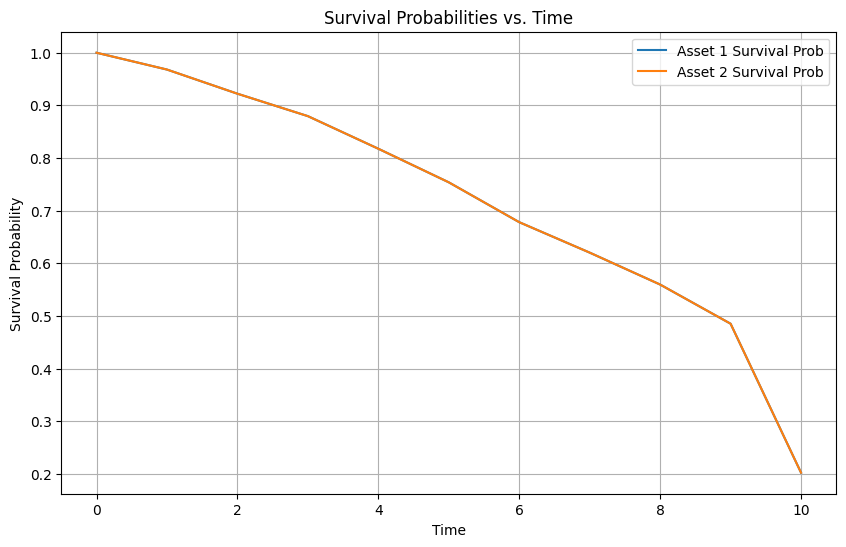

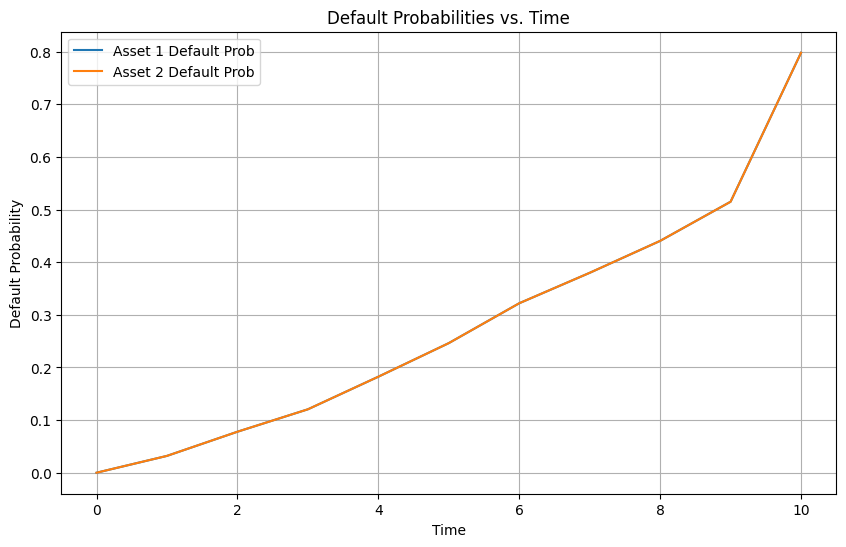

Survival Probability:
          0         1         2         3         4         5         6   \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.968029  0.968029  0.968029  0.968029  0.968029  0.969225  0.969225   
2   0.922149  0.922149  0.922149  0.922149  0.922149  0.924993  0.924993   
3   0.879541  0.879541  0.879541  0.879541  0.879541  0.883841  0.883841   
4   0.817622  0.817622  0.817622  0.817622  0.817622  0.823900  0.823900   
5   0.753814  0.753814  0.753814  0.753814  0.753814  0.761951  0.761951   
6   0.678097  0.678097  0.678097  0.678097  0.678097  0.688178  0.688178   
7   0.620266  0.620266  0.620266  0.620266  0.620266  0.631623  0.631623   
8   0.559607  0.559607  0.559607  0.559607  0.559607  0.572086  0.572086   
9   0.485205  0.485205  0.485205  0.485205  0.485205  0.498720  0.498720   
10  0.202173  0.202173  0.202173  0.202173  0.202173  0.214832  0.214832   

          7         8         9   ...        12        13        

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
for i in range(len(new_data)):
    plt.plot(time_points, survival_prob.iloc[:, i], label=f"Asset {i+1} Survival Prob")
plt.title('Survival Probabilities vs. Time')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for i in range(len(new_data)):
    plt.plot(time_points, default_prob.iloc[:, i], label=f"Asset {i+1} Default Prob")
plt.title('Default Probabilities vs. Time')
plt.xlabel('Time')
plt.ylabel('Default Probability')
plt.legend()
plt.grid(True)
plt.show()

print("Survival Probability:")
print(survival_prob)
print("\nDefault Probability:")
print(default_prob)

plt.figure(figsize=(10, 6)): Creates a new plotting figure with a specified size.

for i in range(len(new_data)):: Loops through each asset in new_data.

plt.plot(time_points, survival_prob.iloc[:, i], label=f"Asset {i+1} Survival Prob"): Plots the survival probabilities for the current asset. We use iloc to correctly index the survival probabilities.

plt.title(...), plt.xlabel(...), plt.ylabel(...): Sets labels and title for the plot.

plt.legend(): Displays a legend in the plot.

plt.grid(True): Adds a grid to the plot.

plt.show(): Displays the survival probability plot.

The following section does the same with the default probability.

print("Survival Probability:"), print(survival_prob): Prints the computed survival probabilities.

print("\nDefault Probability:"), print(default_prob): Prints the computed default probabilities.